<a href="https://colab.research.google.com/github/Ngamimuli/learning-DVF-PT/blob/main/DATA_CLEANING_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA CLEANING
*Objectives*
Iwill be able to:

Practice opening and inspecting the contents of CSVs using pandas dataframes
Practice identifying and handling missing values
Practice identifying and handling invalid values
Practice cleaning text data by removing whitespace and fixing typos
Practice joining multiple dataframes

In [1]:
# IMPORTING OF LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Load the data into DataFrames
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [5]:
# Inspect the dataframes
print(heroes_df.info())
print(heroes_df.describe())
print(heroes_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB
None
       Unnamed: 0      Height      Weight
count  734.000000  734.000000  732.000000
mean   366.500000  102.254087   43.855191
std    212.031837  139.624543  130.823733
min      0.000000  -99.000000  -99.000000
25%    183.250000  -99.000000  -99.000000
50%    366.500000  175.000000   62.000000


In [6]:
# inspecting data set 2
print(powers_df.info())
print(powers_df.describe())
print(powers_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None
       hero_names Agility Accelerated Healing Lantern Power Ring  \
count         667     667                 667                667   
unique        667       2                   2                  2   
top       3-D Man   False               False              False   
freq            1     425                 489                656   

       Dimensional Awareness Cold Resistance Durability Stealth  \
count                    667             667        667     667   
unique                     2               2          2       2   
top                    False           False      False   False   
freq                     642             620        410     541   

       Energy Absorption Flight  ... Web Creation Reality Warping Odin Force  \
count                667    667  ...          667             667 

To answer "What is the distribution of superheroes by publisher?", i will need to clean the heroes_df DataFrame.



In [7]:
# Handling missing values
print(heroes_df.isnull().sum())  # Check for missing values

# Dropping rows where Publisher is missing
heroes_df = heroes_df.dropna(subset=['Publisher'])

# Handling inconsistent text data
heroes_df['Publisher'] = heroes_df['Publisher'].str.strip()  # Remove leading/trailing whitespaces
heroes_df['Publisher'].value_counts()


Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64


<ipython-input-7-ee2fcbaf150a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes_df['Publisher'] = heroes_df['Publisher'].str.strip()  # Remove leading/trailing whitespaces


,count
Publisher,
Marvel Comics,388
DC Comics,215
NBC - Heroes,19
Dark Horse Comics,18
George Lucas,14
Image Comics,14
Star Trek,6
HarperCollins,6
SyFy,5


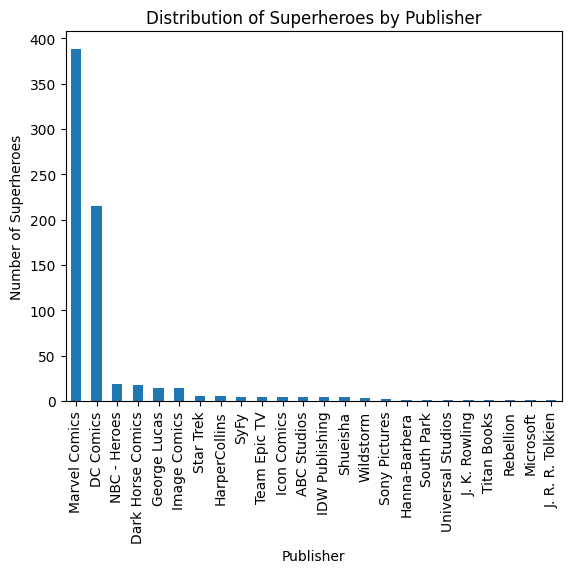

In [8]:
 #Plotting the distribution of superheroes by publisher
import matplotlib.pyplot as plt

publisher_distribution = heroes_df['Publisher'].value_counts()
publisher_distribution.plot(kind='bar')
plt.title('Distribution of Superheroes by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Superheroes')
plt.show()

Performing Data Aggregation and Cleaning for the Second Question
To answer "What is the relationship between height and number of superpowers? And does this differ based on gender?i will merge the two DataFrames and clean the merged data.

In [10]:

heroes_df

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [11]:
# Run this cell without changes
powers_df

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# saving combined data set
merged_df = pd.merge(heroes_df, powers_df, on='name', how='left')

# Convert height to numeric, and handle invalid values (e.g., -99 for height)
merged_df['Height'] = pd.to_numeric(merged_df['Height'], errors='coerce')
merged_df = merged_df[merged_df['Height'] > 0]  # Remove rows with invalid height

# Count the number of superpowers for each superhero
superpower_cols = powers_df.columns[1:]  # Exclude the 'Name' column
merged_df['Superpower_Count'] = merged_df[superpower_cols].sum(axis=1)

# Analyzing the relationship between height and superpower count by gender
import seaborn as sns

sns.lmplot(x='Height', y='Superpower_Count', hue='Gender', data=merged_df, aspect=2)
plt.title('Relationship between Height and Superpower Count by Gender')
plt.show()


KeyError: 'name'

In [16]:
# Run this cell without changes

# Confirms you have created a DataFrame with the specified name
assert type(heroes_and_powers_df) == pd.DataFrame

# Confirms you have the right number of rows
assert heroes_and_powers_df.shape[0] == 647

# Confirms you have the necessary columns
# (If you modified the value of powers_df along the way, you might need to
# modify this test. We are checking that all of the powers are present as
# columns.)
assert [power in heroes_and_powers_df.columns for power in powers_df.index]
# (If you modified the value of heroes_df along the way, you might need to
# modify this as well. We are checking that all of the attribute columns from
# heroes_df are present as columns in the joined df)
assert [attribute in heroes_and_powers_df.columns for attribute in heroes_df.columns]

NameError: name 'heroes_and_powers_df' is not defined

In [18]:
# Filter heroes by Publisher
marvel_df = merged_df[merged_df['Publisher'] == 'Marvel Comics']
dc_df = merged_df[merged_df['Publisher'] == 'DC Comics']

# Summing up the superpowers for each publisher
marvel_powers = marvel_df[superpower_cols].sum().sort_values(ascending=False).head(5)
dc_powers = dc_df[superpower_cols].sum().sort_values(ascending=False).head(5)

# Display the results
print("Top 5 Superpowers in Marvel Comics:")
print(marvel_powers)

print("\nTop 5 Superpowers in DC Comics:")
print(dc_powers)


NameError: name 'merged_df' is not defined

NameError: name 'heroes_and_powers_df' is not defined

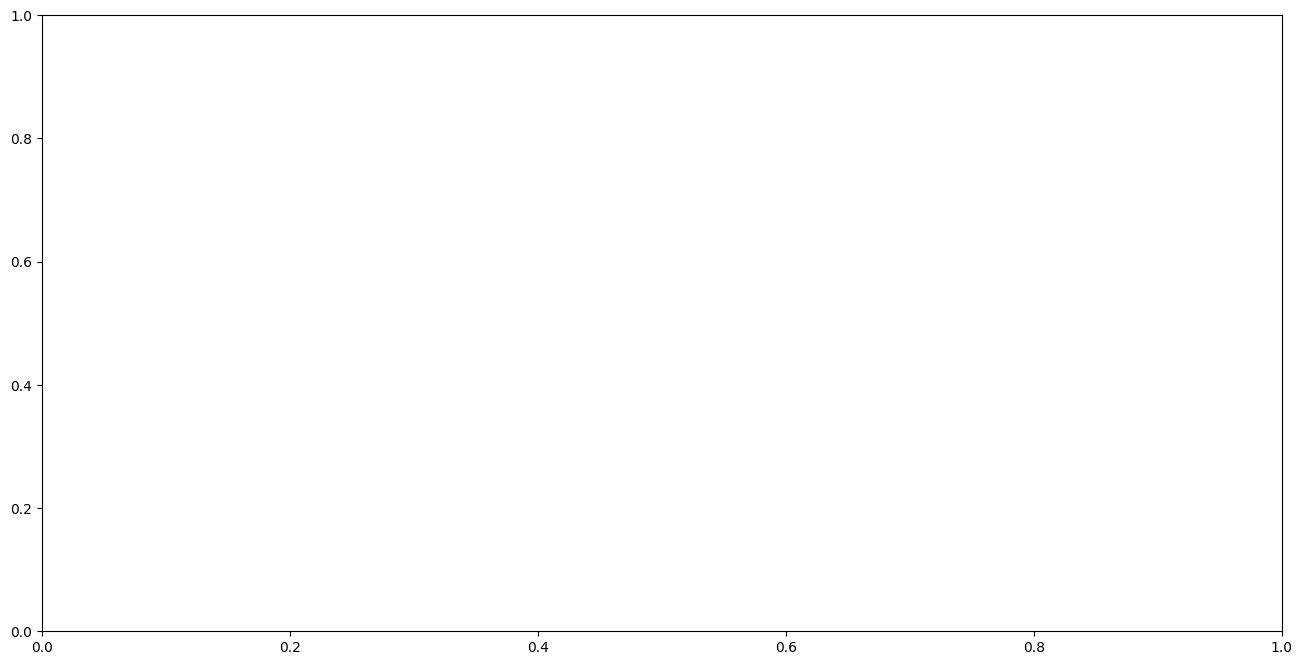

In [19]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=heroes_and_powers_df["Height"], y=heroes_and_powers_df["Power Count"], alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

In [20]:
# Run this cell without changes
heroes_and_powers_df[heroes_and_powers_df["Height"] < 0].sample(5, random_state=1)

NameError: name 'heroes_and_powers_df' is not defined

NameError: name 'question_2_df' is not defined

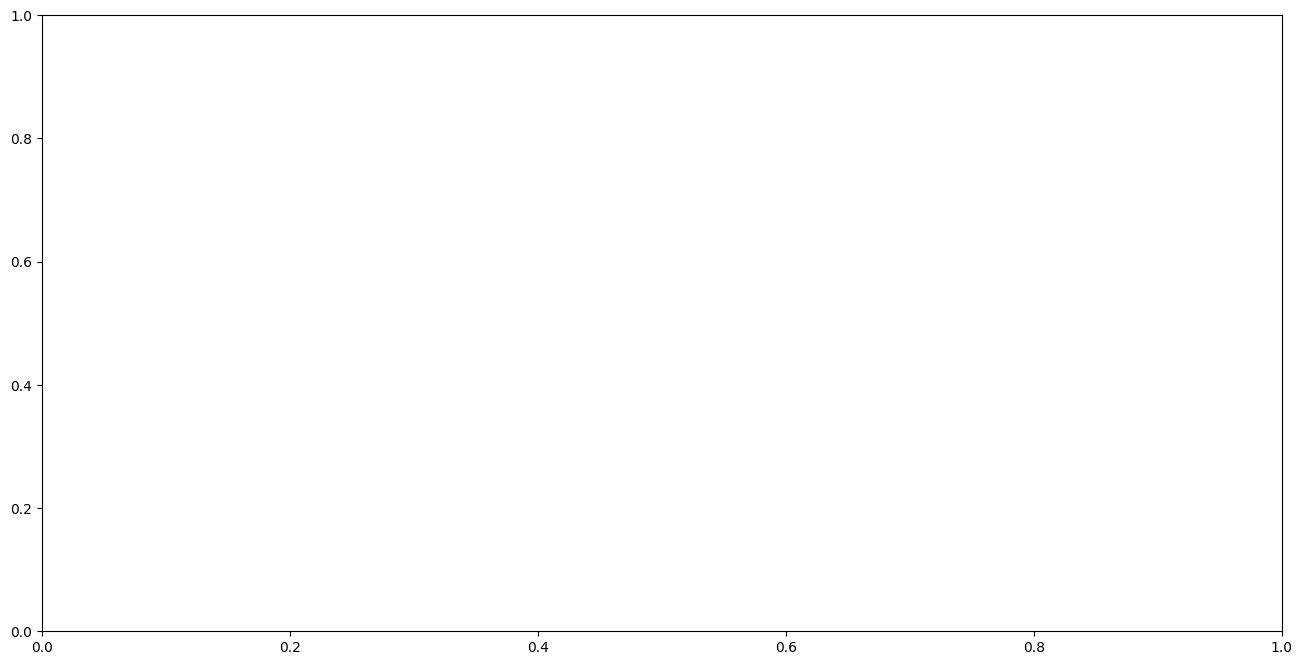

In [21]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[
    (question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")
]

# Plot data with different colors
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.5,
    color="cyan",
    label="Male",
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.5,
    color="gray",
    label="Female",
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.5,
    color="yellow",
    label="Other",
)

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

Formulating and Answering Your Own Question

Question: What is the average weight of superheroes who can fly vs. those who cannot?

In [24]:
# Create a new column indicating if a hero can fly
merged_df['Can_Fly'] = merged_df['Flight'] == True

# Calculate average weight based on flight ability
avg_weight_by_flight = merged_df.groupby('Can_Fly')['Weight'].mean()

print("Average Weight of Superheroes Who Can Fly vs. Those Who Cannot:")
print(avg_weight_by_flight)

# Plotting the results
avg_weight_by_flight.plot(kind='bar')
plt.title('Average Weight of Superheroes: Can Fly vs. Cannot Fly')
plt.xlabel('Can Fly')
plt.ylabel('Average Weight (pounds)')
plt.show()


NameError: name 'merged_df' is not defined

# Summary of Key Steps:
Loading the Data: Load and inspect both datasets using pandas.
Clean the Data: Handle missing values and clean text data to ensure consistency.
Aggregate Data: Perform necessary joins and aggregation to analyze relationships and distributions.
Answer Business Questions: Used visualization and statistical analysis to answer the provided business questions.
Formulate Your Own Question: Created an additional analysis that reveals further insights from the dataset.